In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charaniv","key":"aa79ce1a24cd48201a988ae47dcdd131"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 675M/675M [00:04<00:00, 168MB/s]



In [ ]:
from zipfile import ZipFile
file_name="cell-images-for-detecting-malaria.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import numpy as np
import pandas as pd
import os
print(os.listdir('/content/cell_images'))

['Parasitized', 'Uninfected', 'cell_images']


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [ ]:
parasitized_data = os.listdir('/content/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10])
uninfected_data = os.listdir('/content/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C149P110ThinF_IMG_20151115_115154_cell_256.png', 'C87P48ThinF_IMG_20150820_144714_cell_198.png', 'C180P141NThinF_IMG_20151201_163751_cell_165.png', 'C46P7ThinF_IMG_20151130_210843_cell_140.png', 'C176P137NThinF_IMG_20151201_122811_cell_154.png', 'C149P110ThinF_IMG_20151115_114729_cell_259.png', 'C92P53ThinF_IMG_20150821_151722_cell_223.png', 'C180P141NThinF_IMG_20151201_170110_cell_26.png', 'C59P20thinF_IMG_20150803_111333_cell_146.png', 'C101P62ThinF_IMG_20150923_165215_cell_31.png']


['C53P14thinF_IMG_20150726_114918_cell_23.png', 'C79P40ThinF_IMG_20150817_103901_cell_107.png', 'C162P123ThinF_IMG_20151116_102751_cell_85.png', 'C125P86ThinF_IMG_20151004_102205_cell_57.png', 'C177P138NThinF_IMG_20151201_142942_cell_19.png', 'C4thin_original_IMG_20150608_165540_cell_92.png', 'C231ThinF_IMG_20151112_152234_cell_197.png', 'C184P145ThinF_IMG_20151203_104153_cell_120.png', 'C78P39ThinF_IMG_20150606_104426_cell_16.png', 'C160P121ThinF_IMG_20151116_094509_cell_98.png']


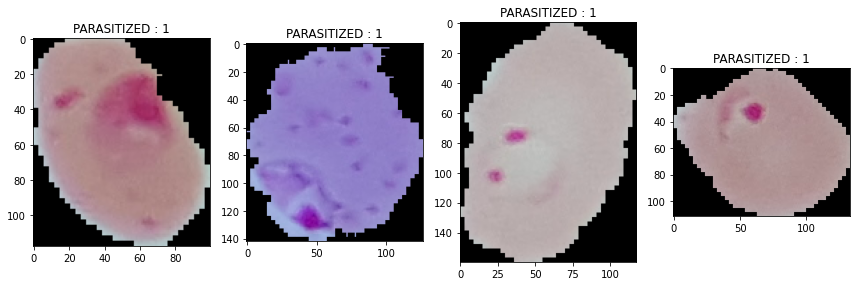

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

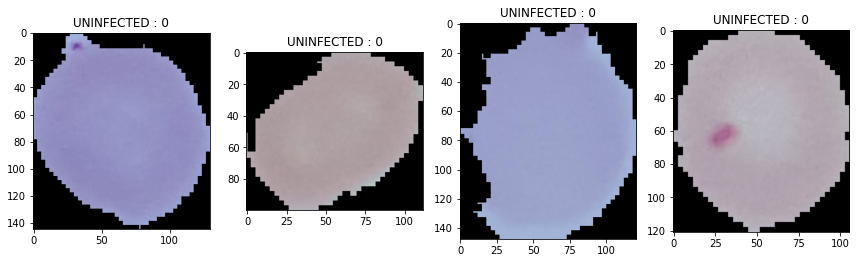

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

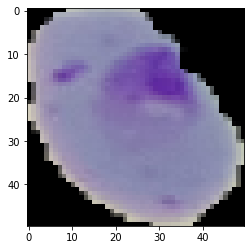

In [ ]:
plt.imshow(data[0])
plt.show()

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [ ]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

In [ ]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    inputShape = (height, width, channels)
    chanDim = -1
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    return model

In [ ]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
689/689 [==============================] - 73s 104ms/step - loss: 0.7912 - accuracy: 0.6864
Epoch 2/20
689/689 [==============================] - 73s 107ms/step - loss: 0.2495 - accuracy: 0.9022
Epoch 3/20
689/689 [==============================] - 71s 104ms/step - loss: 0.1993 - accuracy: 0.9296
Epoch 4/20
689/689 [==============================] - 71s 103ms/step - loss: 0.1817 - accuracy: 0.9380
Epoch 5/20
689/689 [==============================] - 72s 104ms/step - loss: 0.1632 - accuracy: 0.9447
Epoch 6/20
689/689 [==============================] - 72s 105ms/step - loss: 0.1624 - accuracy: 0.9476
Epoch 7/20
689/689 [==============================] - 72s 105ms/step - loss: 0.1623 - accuracy: 0.9458
Epoch 8/20
689/689 [==============================] - 71s 103ms/step - loss: 0.1552 - accuracy: 0.9493
Epoch 9/20
689/689 [==============================] - 72s 104ms/step - loss: 0.1560 - accuracy: 0.9478
Epoch 10/20
689/689 [==============================] - 70s 102ms/step - l

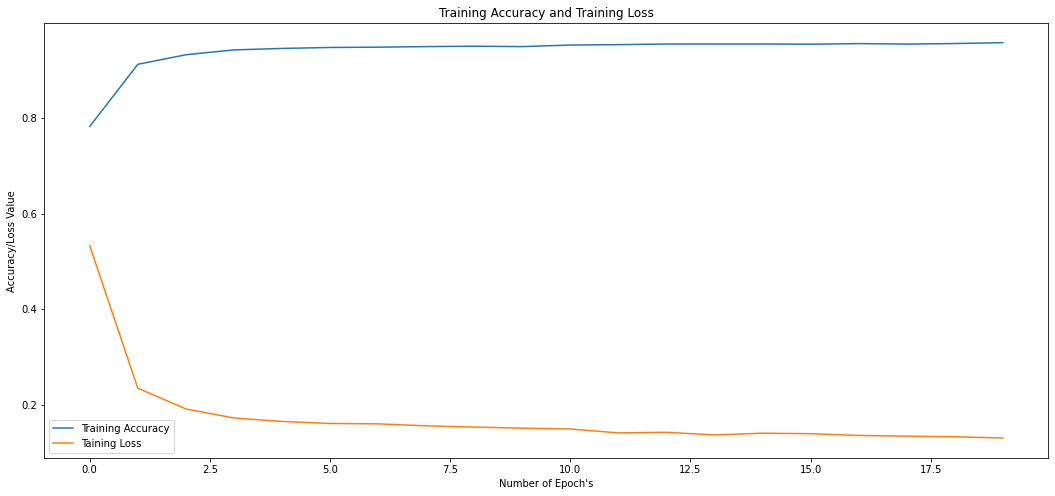

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [ ]:
predictions = model.evaluate(x_test, y_test)

173/173 [==============================] - 5s 27ms/step - loss: 0.1236 - accuracy: 0.9585


In [ ]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.12364836037158966
ACCURACY : 0.9584543108940125
